In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker

import numpy as np
import scipy.constants as const
import scipy.stats as sps
import seaborn as sns
import colorbrewer


uplim = 1e-8
alphaval = 0.04

SMALL_SIZE = 22
MEDIUM_SIZE = 24
BIGGER_SIZE = 26
LINEWIDTH = 3
MARKERSIZE = 5
FIGSIZE = (9.652,9.652)
palette = sns.color_palette("colorblind")

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title
plt.rc('lines', markersize=MARKERSIZE)  # 

In [2]:
def load_dataset(filename):
    data = np.loadtxt(filename,delimiter=',')
    x = data[:,0]
    y = data[:,1]
    sortedIdx = np.argsort(x)
    x = x[sortedIdx]
    y = y[sortedIdx]
    
    return x,y

##exclusion curves from previous experiments for comparison
massSun,kappaSun = load_dataset("reference-exclusion-curves/an13-stellar/solar-dataset.csv")
massxe10,kappaxe10 = load_dataset("reference-exclusion-curves/an15-xenon10/xe10-dataset.csv")
massxe100,kappaxe100 = load_dataset("reference-exclusion-curves/bloch17-xenon/xe100-dataset.csv")
massCDMShvev, kappaCDMShvev = load_dataset("reference-exclusion-curves/agnese20-cdms/cdms-hvev-dataset.csv")
massNano, kappaNano = load_dataset("reference-exclusion-curves/charaev19-nanowire/nanowire-data.csv")
massSensei, kappaSensei = load_dataset("reference-exclusion-curves/barak20-sensei/sensei-dataset.csv")
massDamic, kappaDamic = load_dataset("reference-exclusion-curves/arevalo20-damic/damic-dataset.csv")
massEdel, kappaEdel = load_dataset("reference-exclusion-curves/arnaud20-edelweiss/edelweiss-dataset.csv")
massTokyo, kappaTokyo = load_dataset("reference-exclusion-curves/suzuki15-tokyo/tokyo-dataset.csv")
massFunk, kappaFunk = load_dataset("reference-exclusion-curves/andrianavalomahefa20-funk/funk-dataset.csv")
kappaXenon1TDP=np.loadtxt("reference-exclusion-curves/aprile22-xenon1t.csv",delimiter=',')[:,1]
massXenon1TDP=1000*np.loadtxt("reference-exclusion-curves/aprile22-xenon1t.csv",delimiter=',')[:,0]#units were keV
kappalampost=np.loadtxt("reference-exclusion-curves/chiles22-lampost.csv",delimiter=',')[:,1]
masslampost=np.loadtxt("reference-exclusion-curves/chiles22-lampost.csv",delimiter=',')[:,0]

In [48]:
##limits from Mudhi with measured dielectric stack widths and 85th and 15th percentile of monte carlo simulations
##on the variation of these stack widths
kappaMudhi1V = np.load("plot-data/1-LatestValue.npy")
massMudhi1V = np.load("plot-data/1-LatestValue-energy.npy")

kappaMudhi1VPer85 = np.load("plot-data/1-85-LatestValue.npy")
massMudhi1VPer85 = np.load("plot-data/1-85-LatestValue-energy.npy")


kappaMudhi1VPer15 = np.load("plot-data/1-15-LatestValue.npy")
massMudhi1VPer15 = np.load("plot-data/1-15-LatestValue-energy.npy")

In [40]:
print(len(kappaMudhi1VPer15))

640


In [41]:
##Projected limits for QHaloS Experiments using the same stack but a TES with 1e-4 dark count rate
kappates = np.load("plot-data/1-TES.npy")
masstes = np.load("plot-data/1-TES-energy.npy")

In [42]:
##getting a nice dark color for the QHaloS projections
darkcolor=sns.choose_colorbrewer_palette("sequential")[6]

interactive(children=(Dropdown(description='name', options=('Greys', 'Reds', 'Greens', 'Blues', 'Oranges', 'Pu…

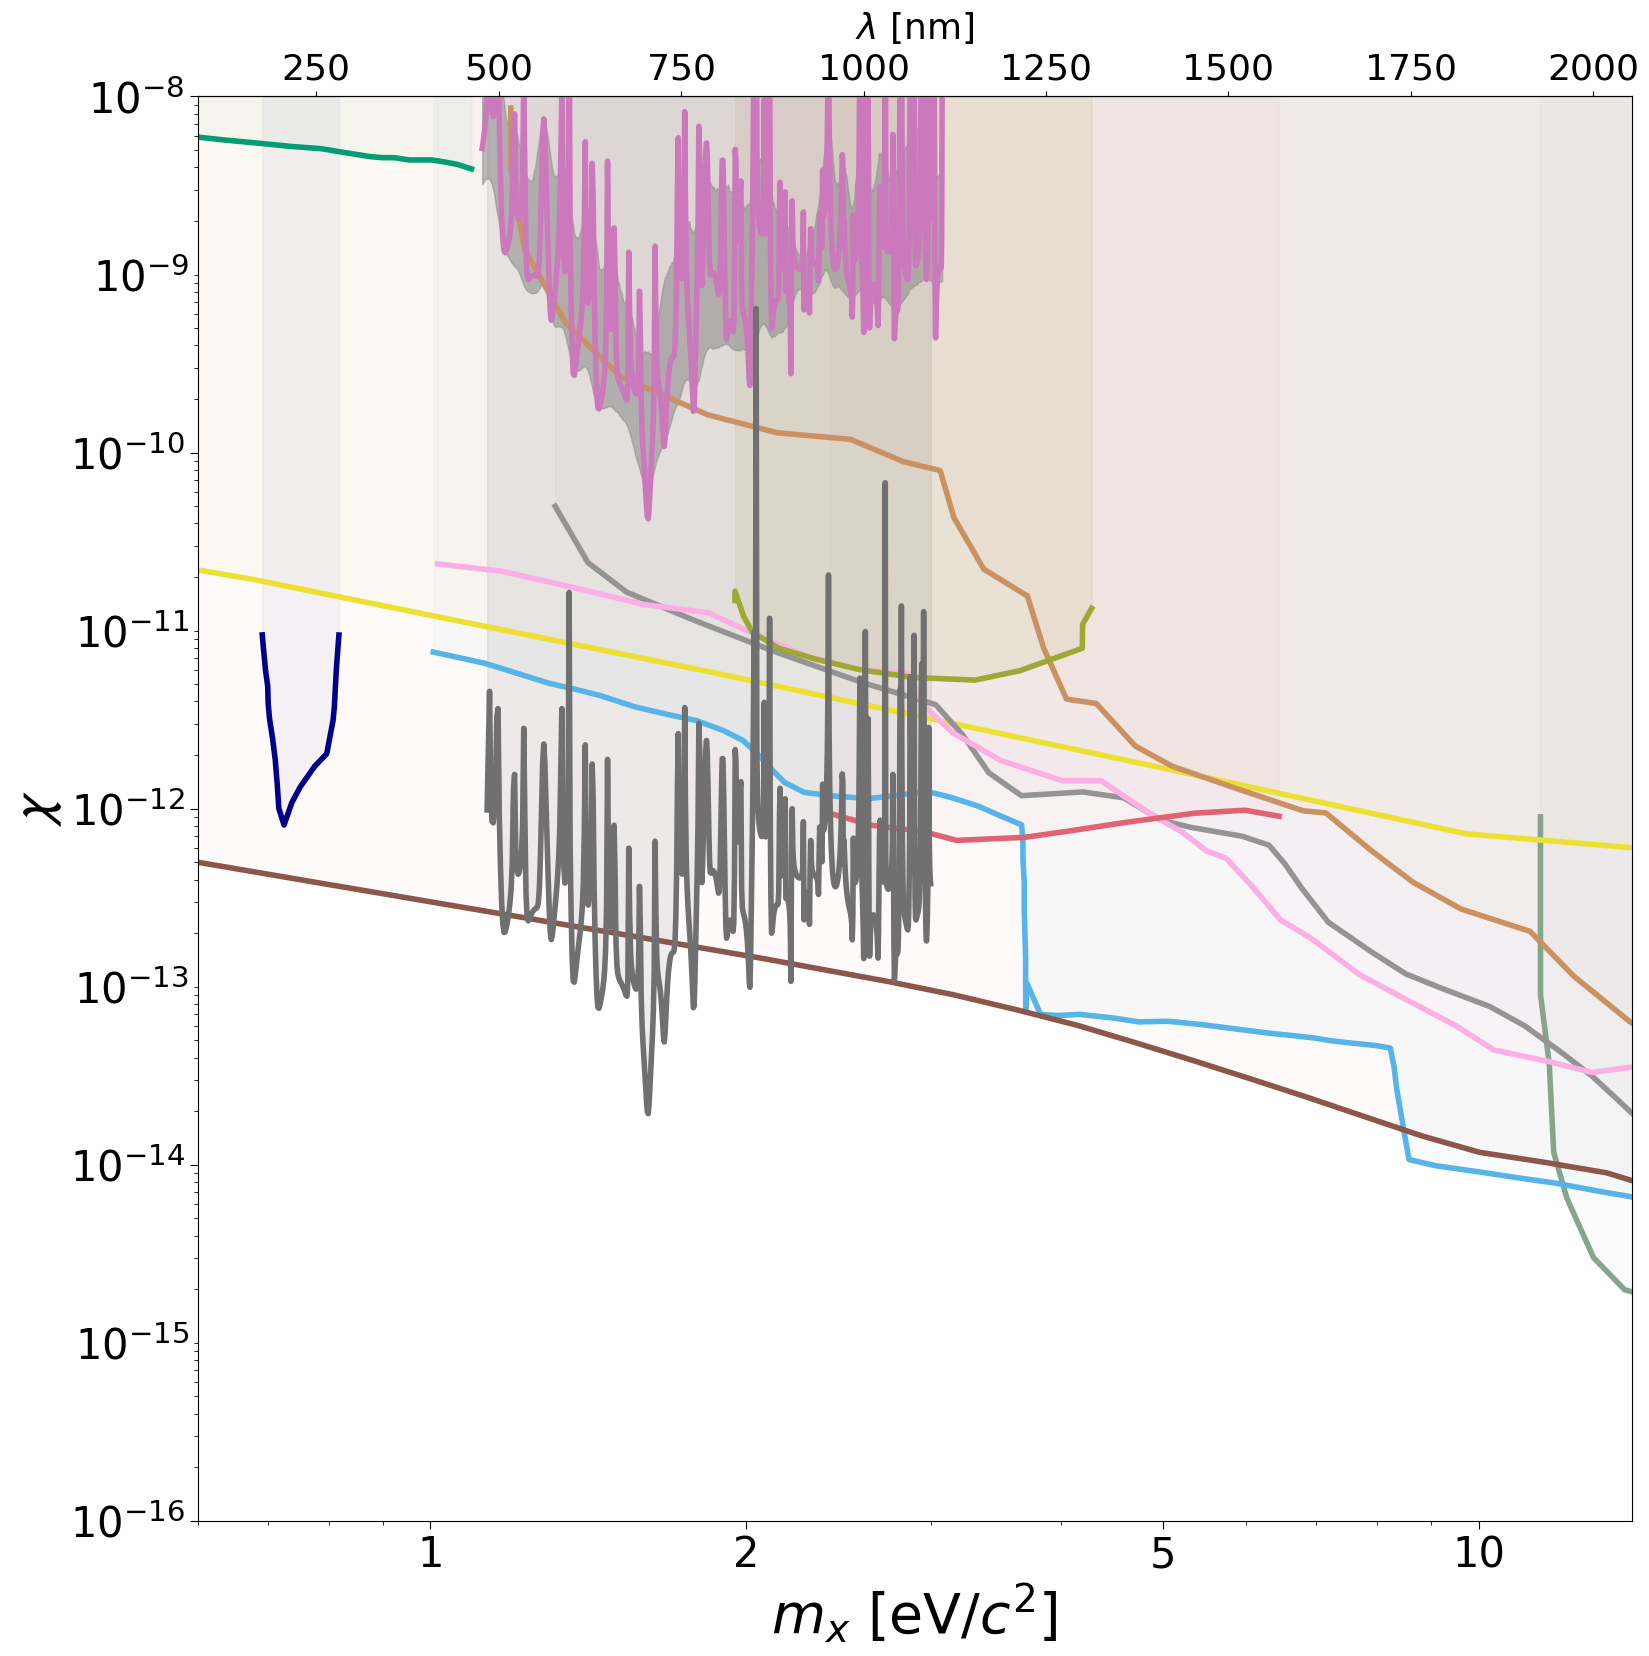

In [50]:
fig, ax = plt.subplots(figsize=FIGSIZE)

ax.plot(massxe10,kappaxe10, color="#85a68d",label="Xe10",linewidth=4)
ax.fill_between(massxe10, kappaxe10, color="#85a68d", y2=uplim,alpha=alphaval)

ax.plot(massSun,kappaSun,color=sns.color_palette("colorblind")[8],label="Solar",linewidth=4)
ax.fill_between(massSun, kappaSun, color=sns.color_palette("colorblind")[8], y2=uplim,alpha=alphaval)

ax.plot(massNano,kappaNano,color=sns.color_palette("colorblind")[2], label="Nanowire",linewidth=4)
ax.fill_between(massNano, kappaNano, color=sns.color_palette("colorblind")[2], y2=uplim,alpha=alphaval)

ax.plot(massSensei,kappaSensei,color=sns.color_palette("colorblind")[9], label="SENSEI",linewidth=4)
ax.fill_between(massSensei, kappaSensei, color=sns.color_palette("colorblind")[9], y2=uplim,alpha=alphaval)

ax.plot(massDamic,kappaDamic,color=sns.color_palette("colorblind")[7], label="DAMIC",linewidth=4)
ax.fill_between(massDamic,kappaDamic, color=sns.color_palette("colorblind")[7], y2=uplim,alpha=alphaval)

ax.plot(massCDMShvev,kappaCDMShvev,color=sns.color_palette("colorblind")[5], label="CDMS-HVEV",linewidth=4)
ax.fill_between(massCDMShvev,kappaCDMShvev, color=sns.color_palette("colorblind")[5], y2=uplim,alpha=alphaval)

ax.plot(massEdel,kappaEdel,color=sns.color_palette("colorblind")[6], label="Edelweiss",linewidth=4)
ax.fill_between(massEdel,kappaEdel, color=sns.color_palette("colorblind")[6], y2=uplim,alpha=alphaval)

ax.plot(massTokyo, kappaTokyo,color='#9ea832', label="Tokyo",linewidth=4)
ax.fill_between(massTokyo, kappaTokyo, color='#9ea832', y2=uplim,alpha=0.1)

ax.plot(massFunk, kappaFunk,color='#e06373', label="FUNK",linewidth=4)
ax.fill_between(massFunk, kappaFunk, color='#e06373', y2=uplim,alpha=alphaval)

ax.plot(massXenon1TDP, kappaXenon1TDP,color='tab:brown', label="Xenon1T SolarDP",linewidth=4)
ax.fill_between(massXenon1TDP, kappaXenon1TDP, color='salmon', y2=uplim,alpha=alphaval)

ax.plot(masslampost, kappalampost,color='darkblue', label="LAMPOST",linewidth=4)
ax.fill_between(masslampost, kappalampost, color='darkblue', y2=uplim,alpha=alphaval)

ax.plot(massMudhi1V,kappaMudhi1V, color=sns.color_palette("colorblind")[4], label="Haloscope",linewidth=4)

ax.fill_between(massMudhi1V,kappaMudhi1V, color=sns.color_palette("colorblind")[4], y2=uplim,alpha=0.06)

ax.fill_between(massMudhi1VPer15,y1=kappaMudhi1VPer15,y2=kappaMudhi1VPer85, color=sns.color_palette("colorblind")[-3],alpha=0.6)

ax.plot(masstes,kappates, color=darkcolor, label="QHalos Predicitons",linewidth=4)
ax.fill_between(masstes,kappates, color=darkcolor, y2=uplim,alpha=0.12)

#ax.plot(massMudhi1Vnew,kappaMudhi1Vnew, color='cornflowerblue', label="Haloscope",linewidth=4)


ax.set_yscale("log")
ax.set_xscale("log")
ax.set_ylim(1e-16,uplim)
#ax.set_xlim(0.8,13)
ax.set_xlim(0.6,14)
ax.set_xlabel("$m_x$ [eV/$c^2$]",fontsize=40)
ax.set_ylabel(r'$\mathcal{\chi}$',fontsize=40)
ax.tick_params(axis='both', which='major',length=6,labelsize=30)
ax.tick_params(axis='both', which='minor',length=3,labelsize=30)

y_major = ticker.LogLocator(base = 10.0, numticks = 5)
ax.yaxis.set_major_locator(y_major)
y_minor = ticker.LogLocator(base = 10.0, subs = np.arange(1.0, 10.0) * 0.1, numticks = 10)
ax.yaxis.set_minor_locator(y_minor)

ax.set_xticks([1,2, 5, 10])
ax.get_xaxis().set_major_formatter(ticker.ScalarFormatter())

transform = lambda m: const.h*const.c/(m*1e-9)*6.2*1e18



secax = ax.secondary_xaxis('top',functions=(transform,transform))
secax.set_xlabel('$\lambda$ [nm]',labelpad=10)
secax.set_xscale("linear")

#plt.legend()
#plt.savefig("exclusion-curve.png",dpi=1000,bbox_inches = 'tight')
fig.set_size_inches(18.5, 18.5, forward=True)
plt.show()